# Race and Ethnicity Data for LA

## Preparing data libraries

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

This step is directly from the class lab, and will allow us to properly analyze and visualize our data.

## Load Census data

I will load one Census data table:

Table B03002: Hispanic or Latino Origin by Race

In [2]:
# loading the three data files

gdf_race = gpd.read_file('data/acs2019_5yr_B03002_raceethnicity.geojson')

## Begin to look at the data


In [3]:
gdf_race.shape

(1005, 45)

There are 1005 rows of data, referencing the 1005 census tracts in LA. There are 45 race and ethnicity variables.

In [4]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002010',
 'B03002011',
 'B03002012',
 'B03002013',
 'B03002014',
 'B03002015',
 'B03002016',
 'B03002017',
 'B03002018',
 'B03002019',
 'B03002020',
 'B03002021',
 'geometry']

In [5]:
# redefine gdf with only columns to keep
gdf_race = gdf_race[columns_to_keep]

This removes any variables that we do not need.

In [6]:
# check the slimmed down gdf
gdf_race.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,...,B03002013,B03002014,B03002015,B03002016,B03002017,B03002018,B03002019,B03002020,B03002021,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,731.0,0.0,0.0,0.0,0.0,383.0,74.0,34.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,99.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,1661.0,0.0,0.0,0.0,0.0,874.0,81.0,48.0,33.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,822.0,0.0,0.0,0.0,0.0,497.0,45.0,11.0,34.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,224.0,0.0,0.0,0.0,0.0,45.0,28.0,28.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


We can run the .head command to see our first five lines of data and to make sure our varaibles were deleted. Next we will redefine the columns to match the variable names.

In [7]:
gdf_race.columns = ['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'N_Some other race alone',
 'N_Two or more races',
 'N_Two races including some other race',
 'N_Two races excluding some other race, and three or more races',
 'Hispanic or Latino',
 'H_White',
 'H_Black',
 'H_Native',
 'H_Asian',
 'H_Native Hawaiian',
 'H_Some other race alone',
 'H_Two or more races',
 'H_Two races including some other race',
 'H_Two races excluding some other race, and three or more races',
 'geometry']

In [8]:
gdf_race.head()

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,...,H_White,H_Black,H_Native,H_Asian,H_Native Hawaiian,H_Some other race alone,H_Two or more races,H_Two races including some other race,"H_Two races excluding some other race, and three or more races",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,731.0,0.0,0.0,0.0,0.0,383.0,74.0,34.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,99.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,1661.0,0.0,0.0,0.0,0.0,874.0,81.0,48.0,33.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,822.0,0.0,0.0,0.0,0.0,497.0,45.0,11.0,34.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,224.0,0.0,0.0,0.0,0.0,45.0,28.0,28.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


See, it worked! Next we create percentage variables.

In [9]:
gdf_race['N_WhitePercentage']=round(((gdf_race['N_White']/ gdf_race['Total'])*100),2)
gdf_race['N_BlacPercentage']=round(((gdf_race['N_Black']/ gdf_race['Total'])*100),2)
gdf_race['N_NativePercentage']=round(((gdf_race['N_Native']/ gdf_race['Total'])*100),2)
gdf_race['N_AsianPercentage']=round(((gdf_race['N_Asian']/ gdf_race['Total'])*100),2)
gdf_race['N_HawaiianPercentage']=round(((gdf_race['N_Native Hawaiian']/ gdf_race['Total'])*100),2)
gdf_race['N_OtherPercentage']=round(((gdf_race['N_Some other race alone']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoPlusPercentage']=round(((gdf_race['N_Two or more races']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoInclOtherPercentage']=round(((gdf_race['N_Two races including some other race']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoPlusThreePlusPercentage']=round(((gdf_race['N_Two races excluding some other race, and three or more races']/ gdf_race['Total'])*100),2)

gdf_race['H_WhitePercentage']=round(((gdf_race['H_White']/ gdf_race['Total'])*100),2)
gdf_race['H_BlacPercentage']=round(((gdf_race['H_Black']/ gdf_race['Total'])*100),2)
gdf_race['H_NativePercentage']=round(((gdf_race['H_Native']/ gdf_race['Total'])*100),2)
gdf_race['H_AsianPercentage']=round(((gdf_race['H_Asian']/ gdf_race['Total'])*100),2)
gdf_race['H_HawaiianPercentage']=round(((gdf_race['H_Native Hawaiian']/ gdf_race['Total'])*100),2)
gdf_race['H_OtherPercentage']=round(((gdf_race['H_Some other race alone']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoPlusPercentage']=round(((gdf_race['H_Two or more races']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoInclOtherPercentage']=round(((gdf_race['H_Two races including some other race']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoPlusThreePlusPercentage']=round(((gdf_race['H_Two races excluding some other race, and three or more races']/ gdf_race['Total'])*100),2)


gdf_race.head()

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,...,N_TwoPlusThreePlusPercentage,H_WhitePercentage,H_BlacPercentage,H_NativePercentage,H_AsianPercentage,H_HawaiianPercentage,H_OtherPercentage,H_TwoPlusPercentage,H_TwoInclOtherPercentage,H_TwoPlusThreePlusPercentage
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,2.69,17.07,0.0,0.0,0.0,0.0,8.94,1.73,0.79,0.93
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,1.97,2.91,0.0,0.0,0.0,0.0,1.41,0.00,0.00,0.00
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,0.22,26.17,0.0,0.0,0.0,0.0,13.77,1.28,0.76,0.52
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,2.65,22.20,0.0,0.0,0.0,0.0,13.43,1.22,0.30,0.92
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,1.60,5.77,0.0,0.0,0.0,0.0,1.16,0.72,0.72,0.00


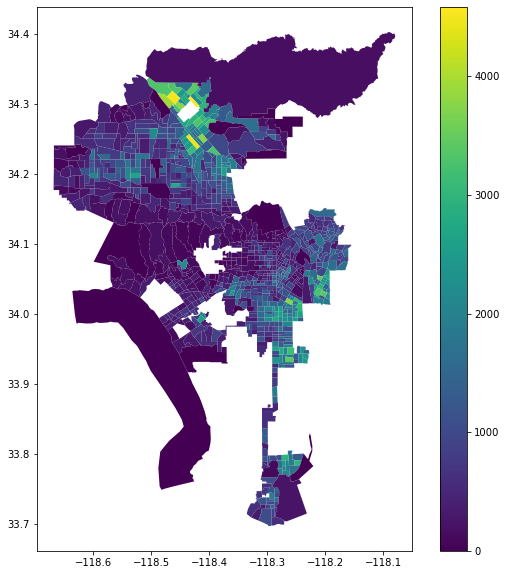

In [10]:
gdf_race.head(1004).plot(figsize=(10,10),column='H_White',legend=True)

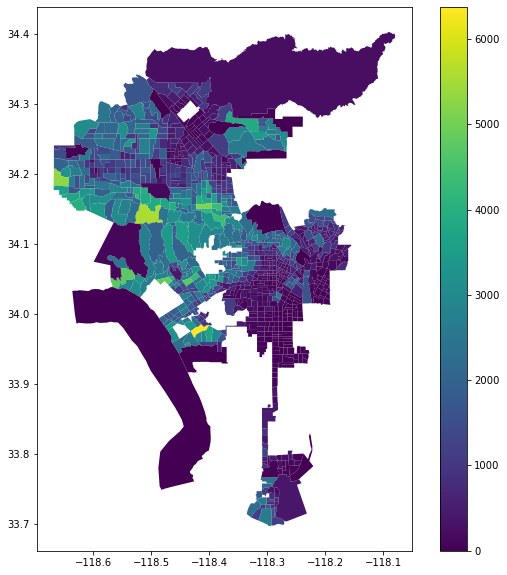

In [31]:
gdf_race.head(1004).plot(figsize=(10,10),column='N_White',legend=True)

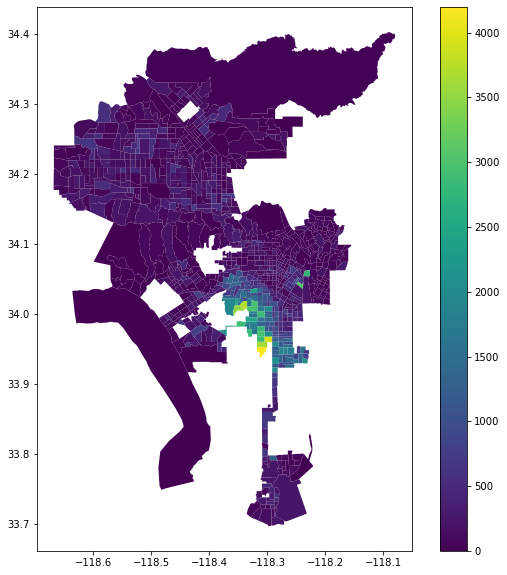

In [32]:
gdf_race.head(1004).plot(figsize=(10,10),column='N_Black',legend=True)

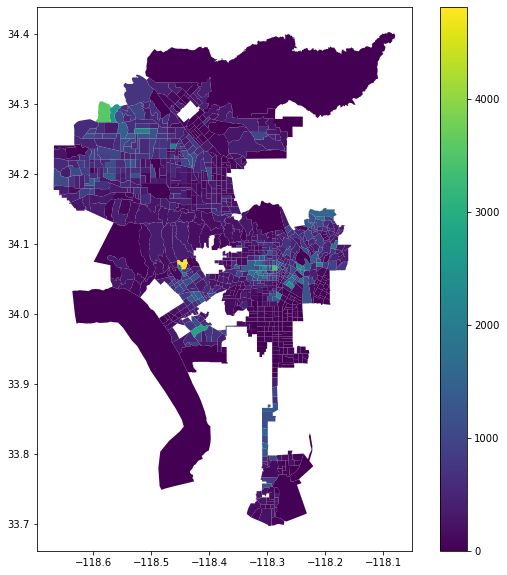

In [33]:
gdf_race.head(1004).plot(figsize=(10,10),column='N_Asian',legend=True)

This graph shows the number of non-hispanic white people in LA.

gdf_race.plot(figsize=(12,10),
                 column='N_Black',
                 legend=True, 
                 scheme='UserDefined', cmap='Oranges',
               classification_kwds=dict(bins=[100000,200000,300000,350000,400000])
             )

This map shows the distribution on non-hispanic Black people in LA.

# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf_race.plot(column='N_Black', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("N_Black")

# spatial lag map on the right
gdf_race.plot(column='H_White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("H_White")

This map shows the concentration of non-hispanic Black people in LA and Hispanic people in LA, respectively. 

Because these are string variables, we will need to redefine them as integers or floats, which I have started below.

In [13]:
df_race01 = gdf_race

In [14]:
df_race01.columns.to_list()

['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'N_Some other race alone',
 'N_Two or more races',
 'N_Two races including some other race',
 'N_Two races excluding some other race, and three or more races',
 'Hispanic or Latino',
 'H_White',
 'H_Black',
 'H_Native',
 'H_Asian',
 'H_Native Hawaiian',
 'H_Some other race alone',
 'H_Two or more races',
 'H_Two races including some other race',
 'H_Two races excluding some other race, and three or more races',
 'geometry',
 'N_WhitePercentage',
 'N_BlacPercentage',
 'N_NativePercentage',
 'N_AsianPercentage',
 'N_HawaiianPercentage',
 'N_OtherPercentage',
 'N_TwoPlusPercentage',
 'N_TwoInclOtherPercentage',
 'N_TwoPlusThreePlusPercentage',
 'H_WhitePercentage',
 'H_BlacPercentage',
 'H_NativePercentage',
 'H_AsianPercentage',
 'H_HawaiianPercentage',
 'H_OtherPercentage',
 'H_TwoPlusPercentage',
 'H_TwoInclOtherPercentage',
 'H_TwoPlusThreePlusPercentage']

In [15]:
df_race02 = ['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'N_Some other race alone',
 'N_Two or more races',
 'N_Two races including some other race',
 'N_Two races excluding some other race, and three or more races',
 'Hispanic or Latino',
 'H_White',
 'H_Black',
 'H_Native',
 'H_Asian',
 'H_Native Hawaiian',
 'H_Some other race alone',
 'H_Two or more races',
 'H_Two races including some other race',
 'H_Two races excluding some other race, and three or more races',

 'N_WhitePercentage',
 'N_BlacPercentage',
 'N_NativePercentage',
 'N_AsianPercentage',
 'N_HawaiianPercentage',
 'N_OtherPercentage',
 'N_TwoPlusPercentage',
 'N_TwoInclOtherPercentage',
 'N_TwoPlusThreePlusPercentage',
 'H_WhitePercentage',
 'H_BlacPercentage',
 'H_NativePercentage',
 'H_AsianPercentage',
 'H_HawaiianPercentage',
 'H_OtherPercentage',
 'H_TwoPlusPercentage',
 'H_TwoInclOtherPercentage',
 'H_TwoPlusThreePlusPercentage']

In [16]:
df_race02

['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'N_Some other race alone',
 'N_Two or more races',
 'N_Two races including some other race',
 'N_Two races excluding some other race, and three or more races',
 'Hispanic or Latino',
 'H_White',
 'H_Black',
 'H_Native',
 'H_Asian',
 'H_Native Hawaiian',
 'H_Some other race alone',
 'H_Two or more races',
 'H_Two races including some other race',
 'H_Two races excluding some other race, and three or more races',
 'N_WhitePercentage',
 'N_BlacPercentage',
 'N_NativePercentage',
 'N_AsianPercentage',
 'N_HawaiianPercentage',
 'N_OtherPercentage',
 'N_TwoPlusPercentage',
 'N_TwoInclOtherPercentage',
 'N_TwoPlusThreePlusPercentage',
 'H_WhitePercentage',
 'H_BlacPercentage',
 'H_NativePercentage',
 'H_AsianPercentage',
 'H_HawaiianPercentage',
 'H_OtherPercentage',
 'H_TwoPlusPercentage',
 'H_TwoInclOtherPercentage',
 'H_TwoPlusThreePlusPercentage']

In [17]:
pip install nbmerge

Processing /home/jovyan/.cache/pip/wheels/2d/3c/a9/8753a8ef327aca9c908d4f150628b87b548e1659ecc5fe1b54/nbmerge-0.0.4-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


nbmerge RaceEthnicityDataMidtermFEB06-Copy1.ipynb IncomeDataMidtermFEB06-Copy1.ipynb > merged_raceincome.ipynb

# Income in Los Angeles

Our group project is a comparison of accessibility and mobility in Los Angeles neighborhoods. We seek to understand who uses transit in LA, and how certain impacts land use or the transportation system may impact their lives. We will be using data from the American Community Survey, LA Metro, the City of LA, LA Times, and the Bureau of Transportation Statistics.

## Preparing data libraries

In [18]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Load Census data

I will load one Census data table:

Table B19013: Median Household Income in the Last 12 Months

In [19]:
# loading the data file

gdf_income = gpd.read_file('data/acs2019_5yr_B19013_income.geojson')

## Begin to look at the data

In [20]:
gdf_income.shape

(1005, 5)

There are 1,005 rows of data which represent the 1,004 census tracts in the city of LA. There are 5 columns which will be discussed later.

In [21]:
gdf_income = gdf_income.drop([1004])

In [22]:
gdf_income.tail()

,geoid,name,B19013001,"B19013001, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",150250.0,13582.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


We use the .head command to get a look at the first 5 lines of data. The columns are: geoid (geographic pinpoint of the tract), name (number identification of the census tract), B19013001 and B19013001, error which I discuss below, and the geometry which is that latitude and longitudinal coordinates. 

Since we do not want a column that has "error" in the name, we remove it by defining which columns to keep. 

In [23]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B19013001',
 'geometry']

In [24]:
# redefine gdf with only columns to keep
gdf_income = gdf_income[columns_to_keep]

In [25]:
# check the slimmed down gdf
gdf_income.head()

,geoid,name,B19013001,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


The dataframe is now reduced to show only the columns we identified, but we still need to rename B19013001. We use the documentation from the dataset to know that this is the variable for median income. 

In [26]:
gdf_income.columns = ['geoid',
 'name',
 'Median Income',
 'geometry']

In [27]:
gdf_income.head()

,geoid,name,Median Income,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


## Now that we have our data fixed, it's time to make some graphs!

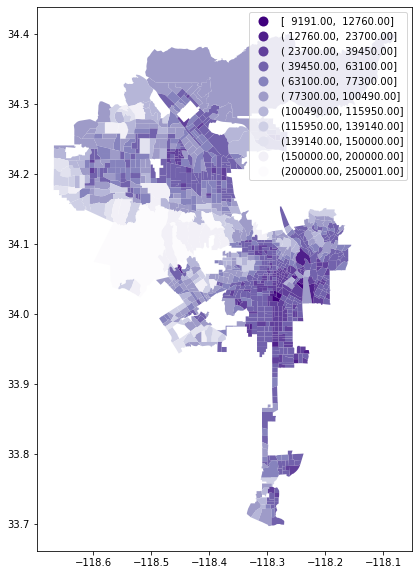

In [52]:
gdf_income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='UserDefined', cmap='Purples_r',
               classification_kwds=dict(bins=[12760,23700,39450,63100,77300,100490,115950,139140,150000,200000])
               )

This map shows the median income by census tract across LA.

Text(0.5, 1.0, 'Median Income')

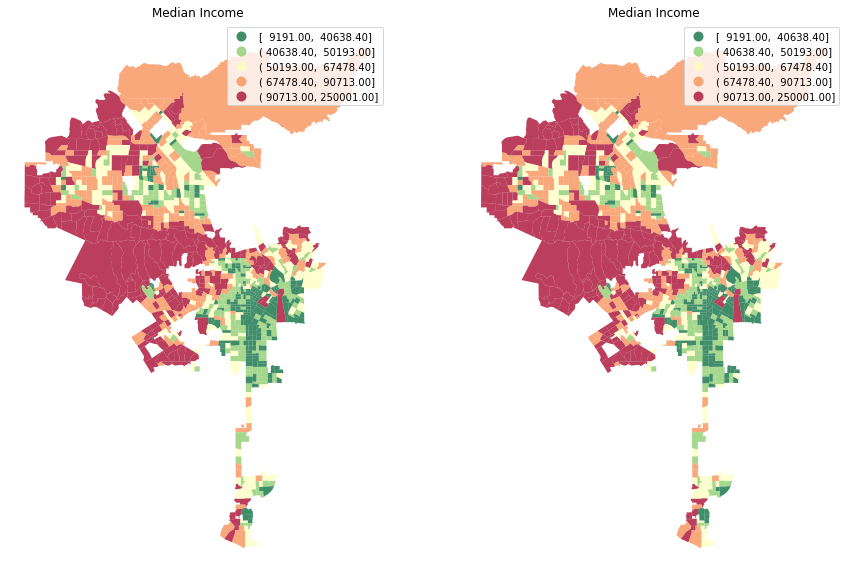

In [29]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf_income.plot(column='Median Income', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Median Income")

# spatial lag map on the right
gdf_income.plot(column='Median Income', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Median Income")

This is another way of displaying information on the median income in LA by census tract.

In [30]:
def race_function():
                    "N_White","N_Black","N_Asian","H_White","H_Black","H_Asian"